## **Heart Disease Dataset**

This dataset dates back to 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the prediction attribute, but all published experiments refer to the use of a subset of 14 of them. The “target” field refers to the presence of heart disease in the patient. It has integer value 0 = no disease and 1 = disease.

**Contents**
1. age: age in years
2. sex: (1 = male; 0 = female)
3. cp: type of chest pain (4 values)
4. trestbps: resting blood pressure (in mm Hg on admission to hospital)
5. chol: serum cholesterol in mg/dl
6. fbs: fasting blood glucose > 120 mg/dl (1 = true, 0 = false)
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate reached
9. exang: exercise-induced angina (1 = yes, 0 = no)
10. oldpeak: exercise-induced ST depression in relation to rest.
11. slope: the slope of the exercise peak ST segment (0,1,2).
12. ca: number of principal vessels (0-3) colored by fluoroscopy.
13. thal: 1 = normal, 2 = fixed defect, 3 = reversible defect
14. target: 0 = no disease, 1 = disease.


Patients' names and social security numbers were recently removed from the database and replaced with fictitious values

In [1]:
#!/bin/bash
!kaggle datasets download johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 12.0MB/s]


In [2]:
!unzip heart-disease-dataset.zip

Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


In [3]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import pickle

################ Machine Learning #############

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
#Lectura del dataset
df = pd.read_csv("/content/heart.csv")
print("The dataset contains", df.shape[0], "rows and", df.shape[1], "columns")

The dataset contains 1025 rows and 14 columns


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


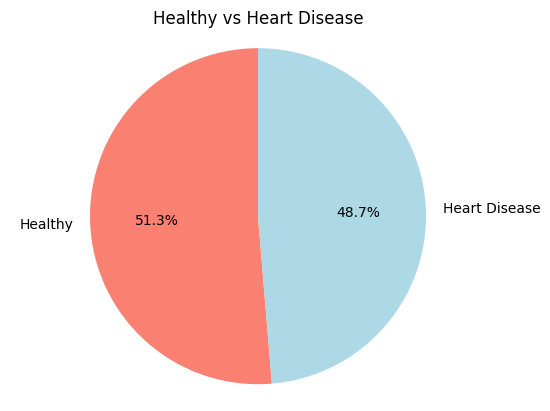

In [11]:
# Create the pie chart to see if the dataset is balanced.
labels = ['Healthy', 'Heart Disease']
values = df['target'].value_counts().values.tolist()
plt.pie(values, labels=labels, colors=['salmon', 'lightblue'], startangle=90, autopct='%1.1f%%')
plt.title('Healthy vs Heart Disease')
plt.axis('equal')

plt.show()

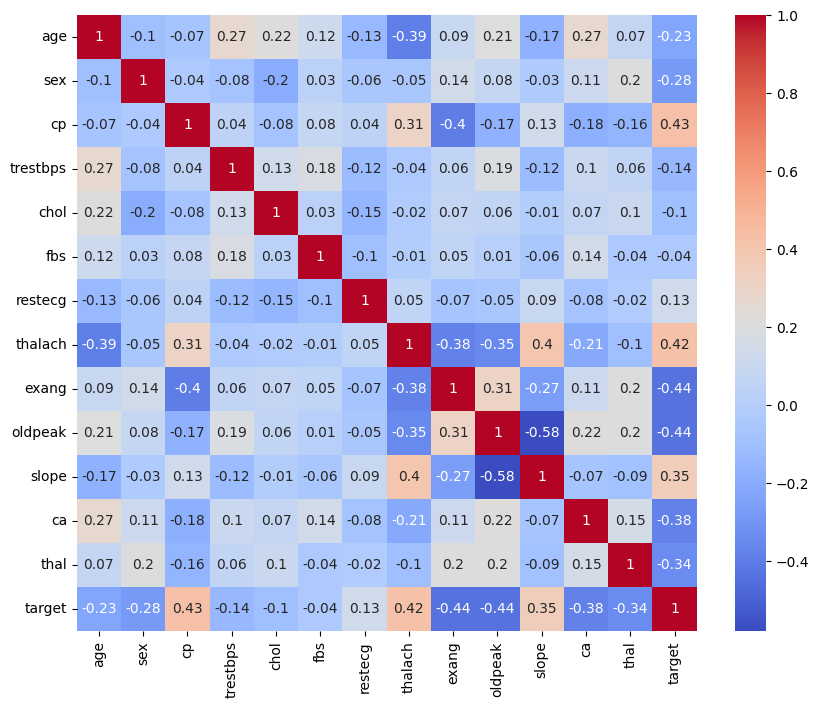

In [12]:
# Create the correlation graph
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(round(corr,2), annot=True, cmap='coolwarm', ax=ax)
plt.show()

### **Frequency of heart disease as a function of sex**

In [18]:
# Creates a new column with the values “Female”, “Male”, “Healthy” and “Sick”.

df['sex_name'] = df['sex'].replace({0: 'Female', 1: 'Male'})
df['target_name'] = df['target'].replace({0: 'Healthy', 1: 'Sick'})

# Create the table
tabla = pd.crosstab(df.target_name, df.sex_name)

# Removes the additional columns from the DataFrame
df.drop(columns=['sex_name'], inplace=True)
df.drop(columns=['target_name'], inplace=True)

print(tabla)

sex_name     Female  Male
target_name              
Healthy          86   413
Sick            226   300


(array([0, 1]), [Text(0, 0, 'Healthy'), Text(1, 0, 'Sick')])

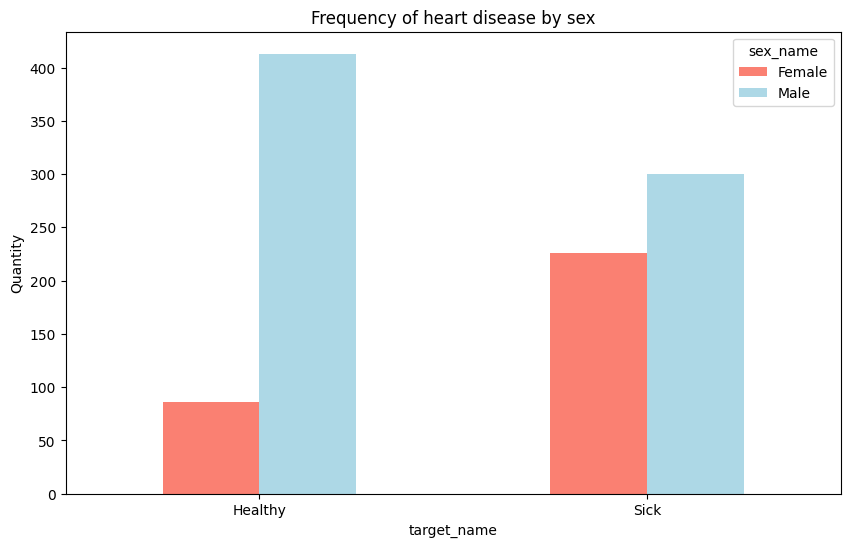

In [19]:
tabla.plot(kind="bar",
           figsize = (10,6),
           color=["salmon","lightblue"] )

plt.title("Frequency of heart disease by sex")
plt.ylabel("Quantity")
plt.xticks(rotation=0)

### **Frequency of heart disease as a function of age**

In my country, according to the Ministry of Health and Social Protection of Colombia, the life cycle can be divided into different stages of development, although they should not be taken absolutely and remember that there is individual and cultural diversity. The following classification is an example:

* Early Childhood (0-5 years)
* Infancy (6 - 11 years)
* Adolescence (12 - 18 years)
* Youth (14 - 26 years)
* Adulthood (27 - 59 years old)
* Elderly (60 years and over) aging and old age.

For this case, as observed in the df.describe the minimum age in our dataframe is 29, so the frequency of heart disease as a function of age will be observed in adults and the elderly.

In [27]:
# Defines age limits for each category
bins = [29, 60, float('inf')]

# Define the category names
labels = ['Adulthood', 'Elderly']

# Create a new column with age categories
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Create a new column with the values “Healthy” and “Sick”.
df['target_name'] = df['target'].replace({0: 'Healthy', 1: 'Sick'})

# Create a frequency table
tablax = pd.crosstab(df['target_name'], df['age_category'])
print(tablax)

age_category  Adulthood  Elderly
target_name                     
Healthy             338      161
Sick                415      111


In [28]:
# Calculate the percentage of sick people in each age category

total_adults = tablax.loc['Sick', 'Adulthood'] + tablax.loc['Healthy', 'Adulthood']
total_elderly = tablax.loc['Sick', 'Elderly'] + tablax.loc['Healthy', 'Elderly']

percentage_sick_adults = tablax.loc['Sick', 'Adulthood'] / total_adults * 100
percentage_sick_elderly = tablax.loc['Sick', 'Elderly'] / total_elderly * 100

print('% of sick people in Adulthood:', percentage_sick_adults)
print('% of sick people in Elderly:', percentage_sick_elderly)

# Remove additional columns from the DataFrame
df.drop(columns=['age_category'], inplace=True)
df.drop(columns=['target_name'], inplace=True)


% of sick people in Adulthood: 55.112881806108895
% of sick people in Elderly: 40.80882352941176


### **Model training**

In [29]:
# Split the dataset into X and y

X = df.drop('target', axis=1)
y = df['target']

# Scale the X data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [30]:
# Create the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the accuracy and confusion matrix on the test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Evaluate the model's performance
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{confusion}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8682926829268293
Confusion matrix:
[[ 77  12]
 [ 15 101]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        89
           1       0.89      0.87      0.88       116

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [31]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate the accuracy and confusion matrix on the test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Evaluate the model's performance
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{confusion}")
print(classification_report(y_test, y_pred))

Accuracy: 0.848780487804878
Confusion matrix:
[[ 73  16]
 [ 15 101]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        89
           1       0.86      0.87      0.87       116

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [32]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Calculate the accuracy and confusion matrix on the test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Evaluate the model's performance
print(f"Accuracy: {accuracy}")
print(f"Confusion matrix:\n{confusion}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion matrix:
[[ 89   0]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       116

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



The model has perfect accuracy on the test set, which may be indicative of overfitting. It is necessary to evaluate the performance of the model on the training set and perform cross-validation techniques to get a more accurate idea of the model's performance on unseen data.


In [33]:
# Apply CrossValidation
scores = cross_val_score(dtc, X_train, y_train, cv=10)
print("The average accuracy is", scores.mean(), "and the standard deviation of cross-validation is", scores.std())

The average accuracy is 0.9878048780487806 and the standard deviation of cross-validation is 0.010907648670730692


The average accuracy obtained through cross-validation is 0.987 and the standard deviation is 0.010, suggesting that the model performs excellently on the data set. It is important to note that cross-validation helps us to obtain a more accurate estimate of the model performance on unseen data and reduces the risk of overfitting.

In [34]:
with open('dtc_model.pkl', 'wb') as file:
    pickle.dump(dtc, file)